# HELLO FRESH NL

### *The data is from 1st September 2015 to 28 June 2018. The first part looks at the data as a whole, while the second part looks at it from month to month.*

In [1]:
#packages
import pandas as pd
import csv
import matplotlib as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import glob
import pycountry
from datetime import datetime

#chaning the number of columns that are displayed. get will tell you how much. 
pd.set_option("display.max_columns",50)
sns.set_style("darkgrid")

pd.options.mode.chained_assignment = None

In [2]:
##### Cleaning

df_asl=pd.read_excel("lt_asl.xlsx")

#dropping columns
df_asl.drop(columns=["id","status","real_budget","start_date","end_date","url","ad_set_campaign_id",
                       "margin_percentage","facebook_ad_set_id","facebook_ad_account_id","facebook_business_id",
                       "short_url","ad_url_domain_id"], inplace=True)


#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_asl["marginP"] = df_asl.apply(woo, axis=1)
df_asl["marginP"] = df_asl["marginP"].round(2)

# 1. Ad Set Level

## 1.1 MarginP

### *Top Performing Campaigns*

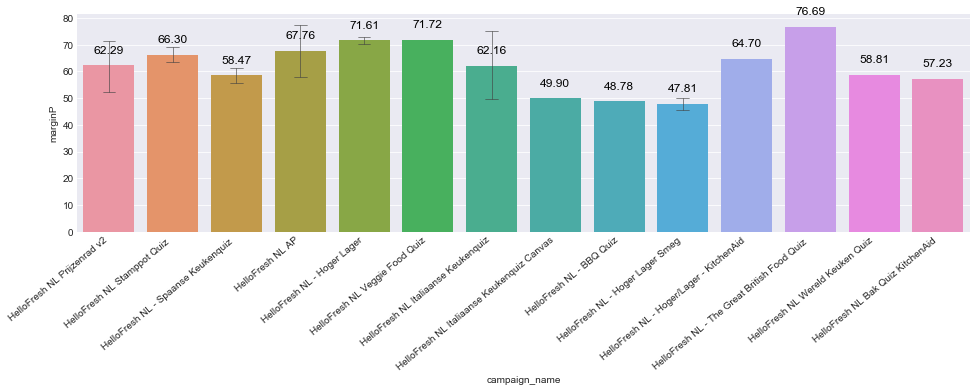

In [3]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="marginP", data=df_asl.nlargest(30,'margin'), capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

### *Worst Performing Campaigns*

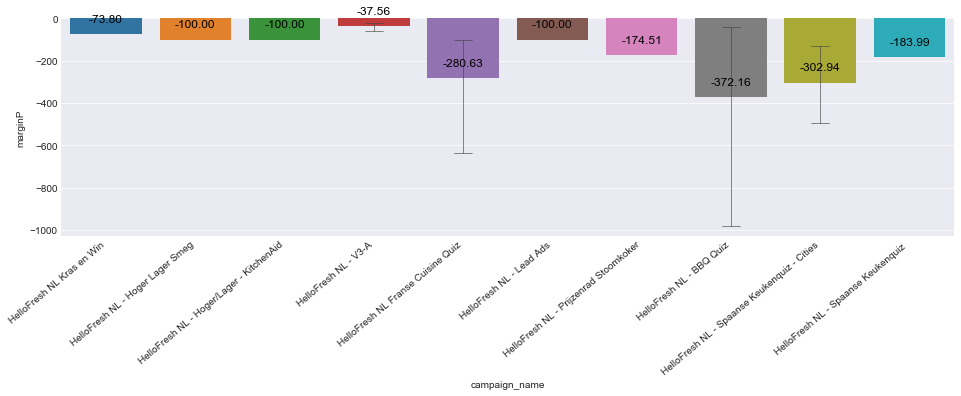

In [4]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="marginP", data=df_asl.nsmallest(30,'margin'), capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

In [5]:
#total by campaign
df_asl['total']=1
df_asl_group=df_asl.groupby(by=['campaign_name']).sum()

## 1.2 Margin

### *Top Performing Campaigns*

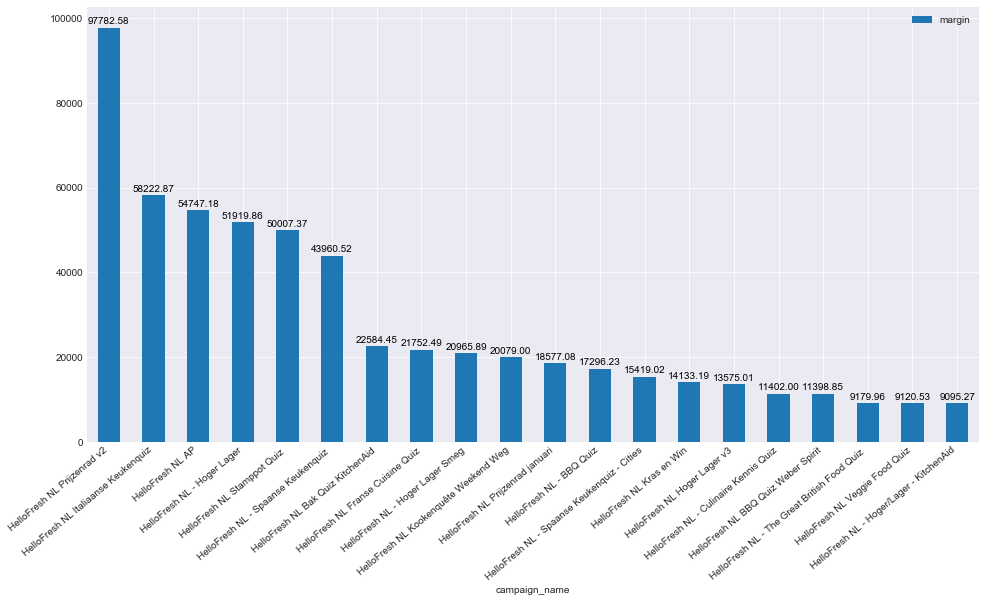

In [6]:
pa=df_asl_group[["margin"]].nlargest(20,'margin').plot(kind="bar", figsize=(16,8))
pa.set_xticklabels(pa.get_xticklabels(), rotation=40, ha="right")
for p in pa.patches:
             pa.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=10, color="black", xytext=(0, 6),
                 textcoords="offset points")

### *Worst Performing Campaigns*

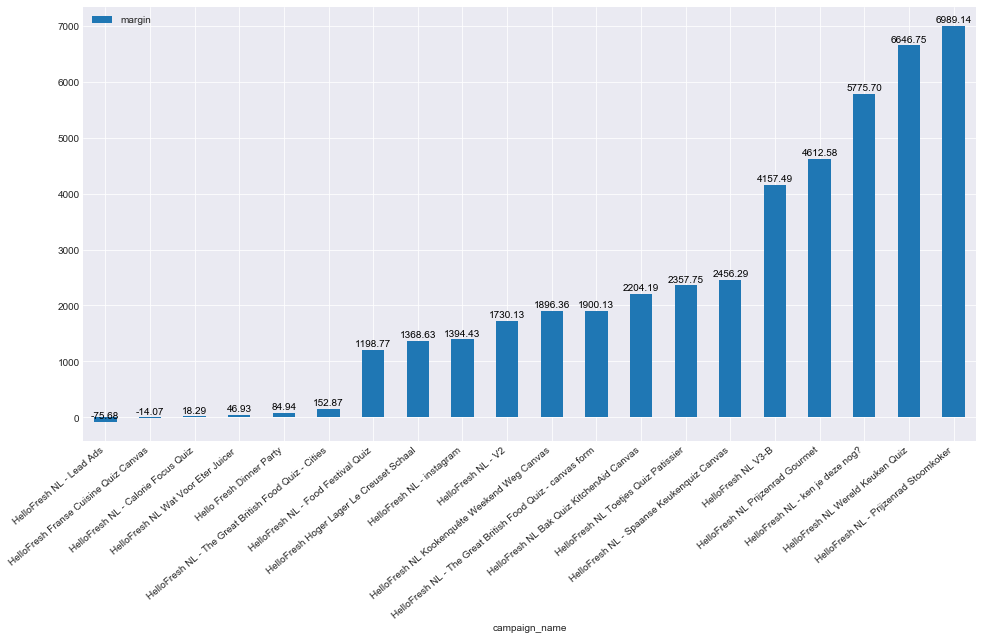

In [7]:
pa=df_asl_group[["margin"]].nsmallest(20,'margin').plot(kind="bar", figsize=(16,8))
pa.set_xticklabels(pa.get_xticklabels(), rotation=40, ha="right")
for p in pa.patches:
             pa.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=10, color="black", xytext=(0, 6),
                 textcoords="offset points")

## 1.3 CTR

*average CTR per campaign*

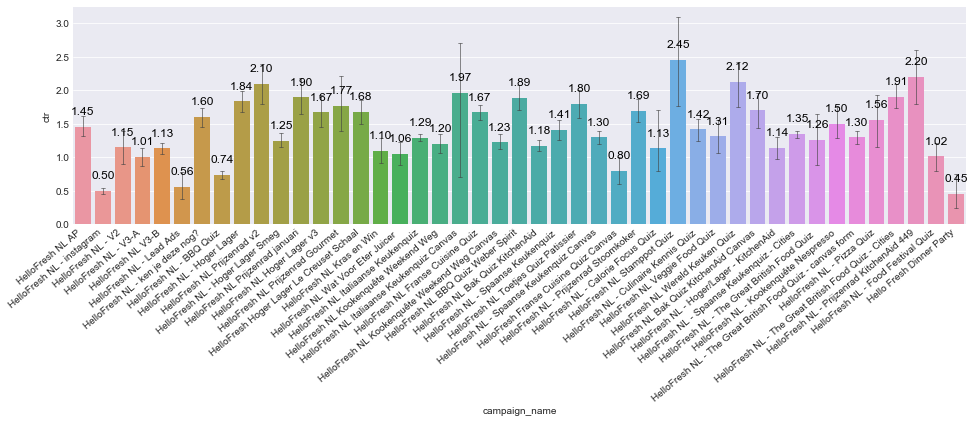

In [8]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="ctr", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.4 CPC

*average CPC per campaign*

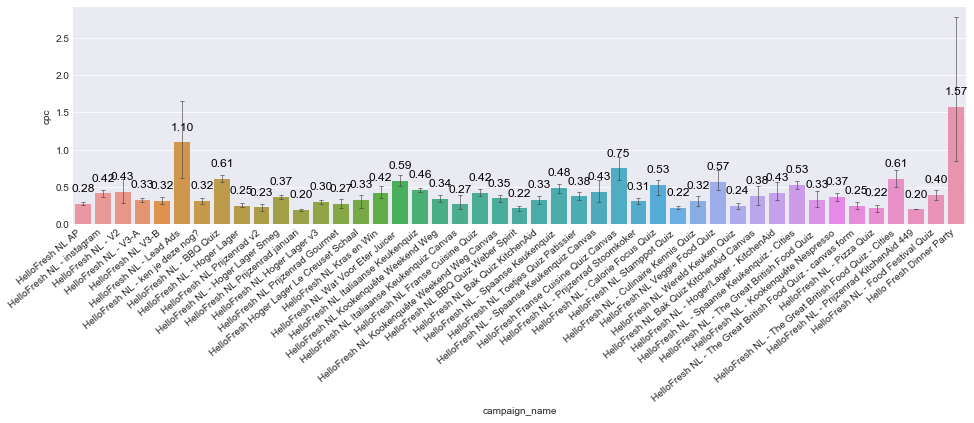

In [9]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cpc", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.5 CPM

*average CPM per campaign*

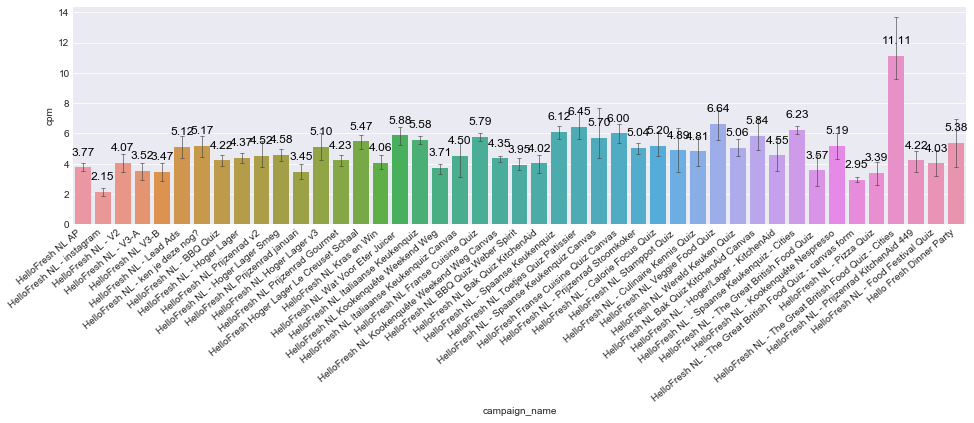

In [10]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cpm", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.6 CR

*average CR per campaign*

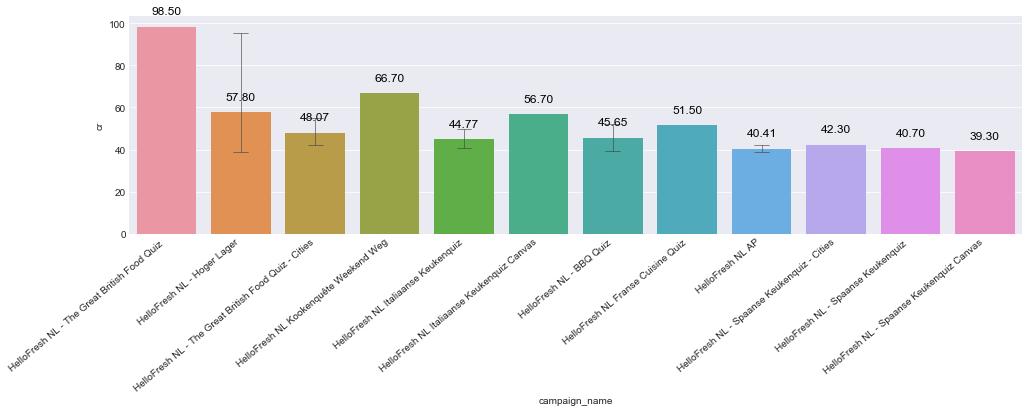

In [11]:
#dropped indez 704 since the CR was so massive (7900)
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cr", data=df_asl.loc[df_asl['cr']<=1000].nlargest(50,'cr'), capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.7 CPA

*average CPA per campaign*

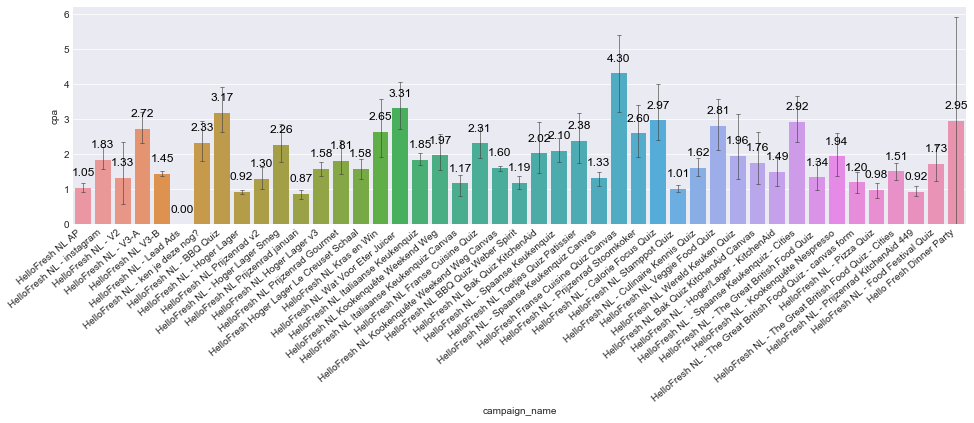

In [12]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cpa", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

______

# 2. Month by Month

In [13]:
#importing multiple files using glob
#getting bert data
sheetnames=glob.glob("m_*.xlsx")
list_of_dfs = [pd.read_excel(sheet) for sheet in sheetnames]
for dataframe, sheet in zip(list_of_dfs, sheetnames):
    dataframe["mon_raw"] = sheet
df_monthly = pd.concat(list_of_dfs, ignore_index=True) 

In [14]:
#dropping unused columns
df_monthly.drop(columns=["id","ad_set_campaign_id","status","margin_percentage","currency","facebook_business_id",
                     "real_budget","revenue_type","facebook_ad_set_id","facebook_ad_account_id","start_date",
                     "end_date","short_url","ad_url_domain_id","url"], inplace=True)

#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_monthly["marginP"] = df_monthly.apply(woo, axis=1)
df_monthly["marginP"] = df_monthly["marginP"].round(2)

df_monthly["month"] = df_monthly["mon_raw"].str.split("_").str[1]
df_monthly.drop(columns=["mon_raw"], inplace=True)

In [15]:
order=["15 Sep","15 Oct","15 Nov","15 Dec",
       "16 Jan","16 Feb","16 Mar","16 Apr","16 May","16 Jun","16 Jul","16 Aug","16 Sep","16 Oct","16 Nov","16 Dec",
       "17 Jan","17 Feb","17 Mar","17 Apr","17 May","17 Jun","17 Jul","17 Aug","17 Sep","17 Oct","17 Nov","17 Dec",
       "18 Jan","18 Feb","18 Mar","18 Apr","18 May","18 Jun"]

## 2.1 Average Margin % per Ad

The month with the highest average margin % per ad was September 2015 at 68.48. Unfortunately, this was also the first month of ads.    
The month with the lowest average margin % per ad was March 2016 at -37.29.

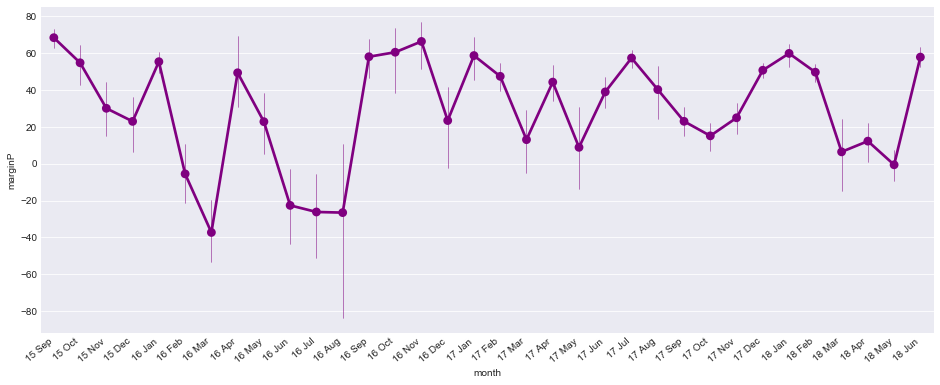

In [16]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="marginP", color="purple", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [17]:
#total by marketer
df_monthly['total']=1
df_monthly_total=df_monthly.groupby(by=['month']).sum()
df_monthly_total["margin_%"]=(df_monthly_total["margin"]/df_monthly_total["revenue"])*100
df_monthly_total["margin_%"]=df_monthly_total["margin_%"].round(2)
df_monthly_total["Month"]=df_monthly_total.index

## 2.2 Total Margin % Per Month

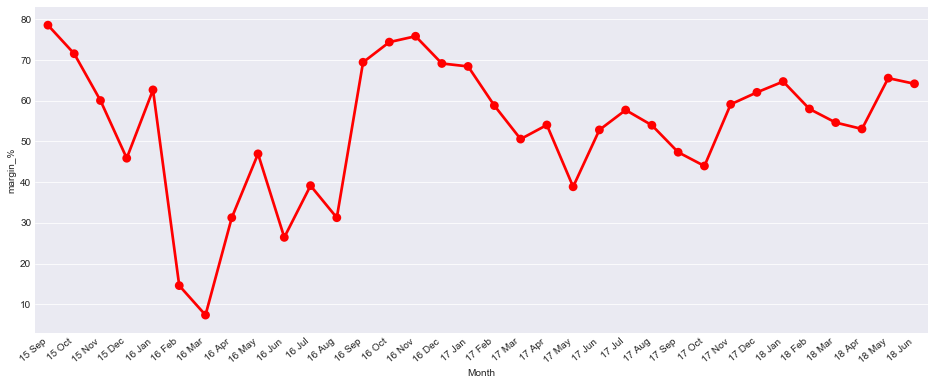

In [18]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="Month", y="margin_%", color="red", errwidth=.5, data=df_monthly_total, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.3 Total Margin Per Month

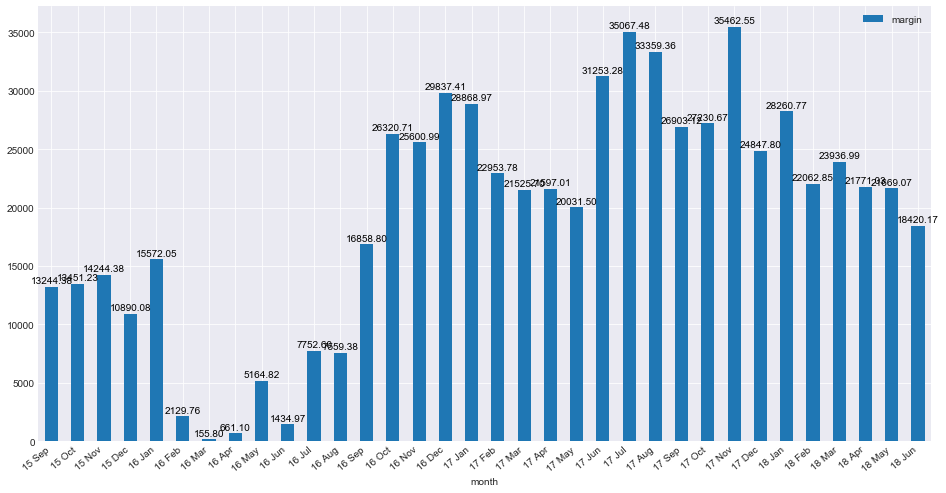

In [19]:
pa=df_monthly_total[["margin"]].loc[order].plot(kind="bar", figsize=(16,8))
pa.set_xticklabels(pa.get_xticklabels(), rotation=40, ha="right")
for p in pa.patches:
             pa.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=10, color="black", xytext=(0, 6),
                 textcoords="offset points")

## 2.4 CTR

*average CTR per ad*

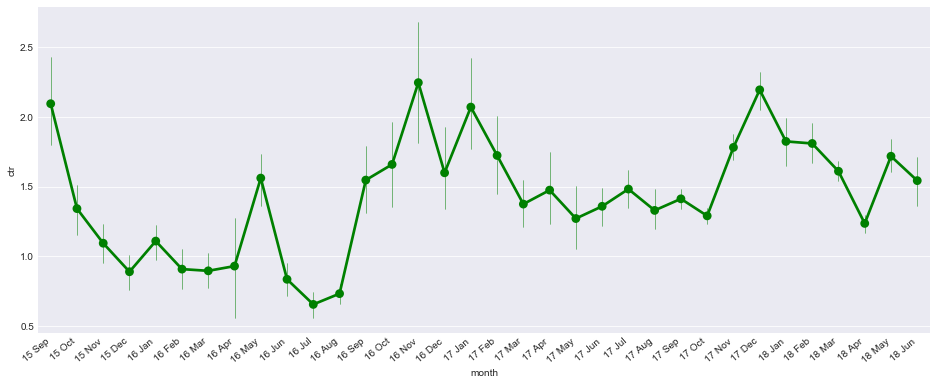

In [20]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="ctr", color="G", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.5 CPC

*average CPC per ad*

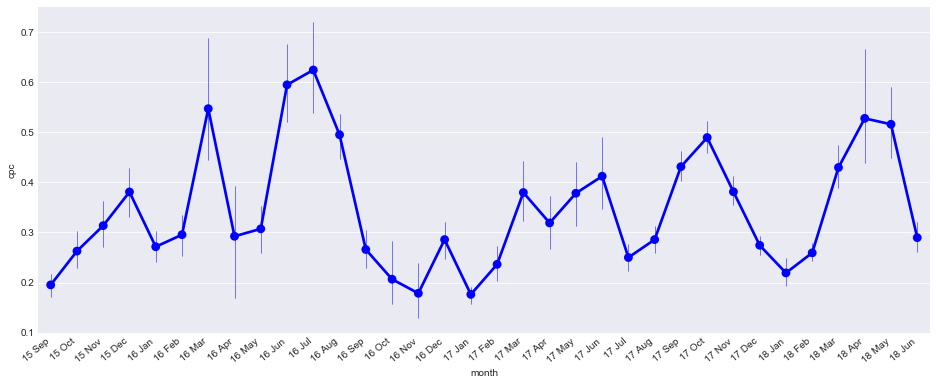

In [21]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cpc", color="B", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.6 CPM

*average CPM per ad*

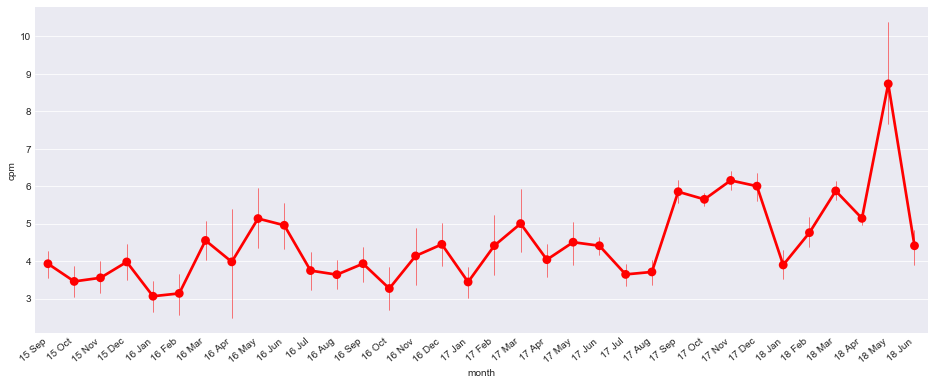

In [22]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cpm", color="r", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.7 CR

*average CR per ad*

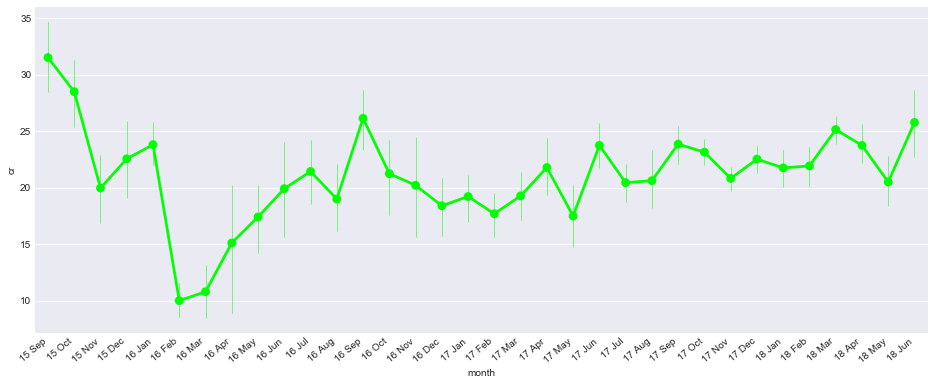

In [23]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cr", color="lime", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.8 CPA

*average CPA per ad*

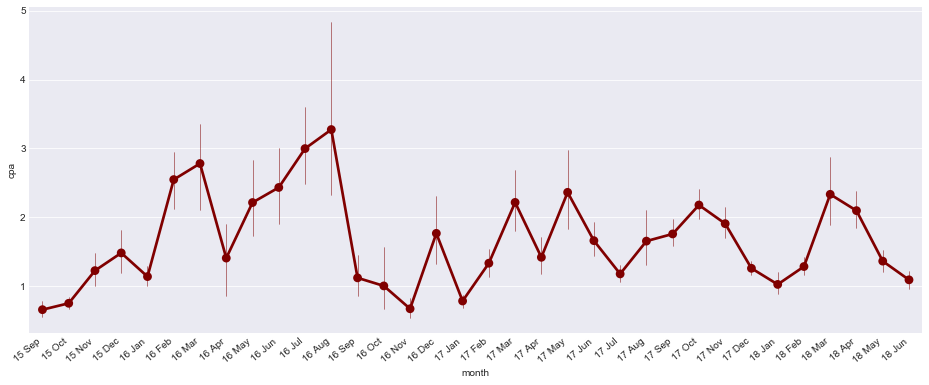

In [24]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cpa", color="maroon", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [25]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>

_____

# 3. Rough Testing with BM data

This data is a subset of HelloFresh

## 3.1 Result per campaign in Device Platform

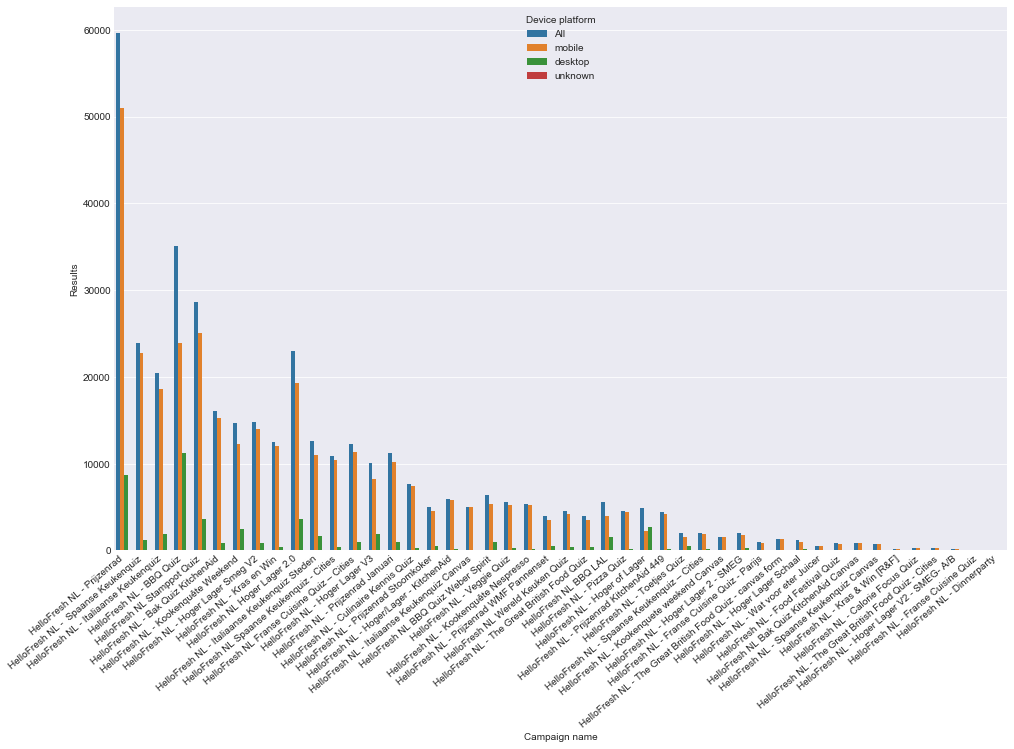

In [26]:
X=pd.read_csv("Untitled-report-Jun-16-2016-Jun-28-2018.csv")
plt.pyplot.figure(figsize=(16,10))
ja=sns.barplot(x="Campaign name", y="Results", hue="Device platform", data=X)
ja.set_xticklabels(ja.get_xticklabels(), rotation=40, ha="right")
ja

In [27]:
x=pd.read_csv("Untitled-report-Jan-1-2018-Jun-28-2018.csv")
y=pd.read_excel("adset_2018529_1530255800893.xlsx")

#dropping columns
y.drop(columns=["id","status","real_budget","start_date","end_date","url","ad_set_campaign_id","margin_percentage",
                "facebook_ad_set_id","facebook_ad_account_id","facebook_business_id","short_url",
                "ad_url_domain_id","insert_time","update_time","revenue_type","currency"],inplace=True)

x.drop(columns=["Ad set ID","Delivery status","Delivery level","Result Type"],inplace=True)
    
y["marginP"] = y.apply(woo, axis=1)
y["marginP"] = y["marginP"].round(2)

In [28]:
x["tag"]=x['Ad set name'].str.split(',').str[0]

In [29]:
result = pd.merge(x, y, on='tag')
result = result.fillna(value=0)

In [30]:
results_out=result.loc[result["Results"]<=2000]

## 3.2 Regression with Frequency and Results (in leads with the outlier excluded)

The regression shows a small but significant effect of Frequency on Results.  
A frequency of 2 seems to be the best. 

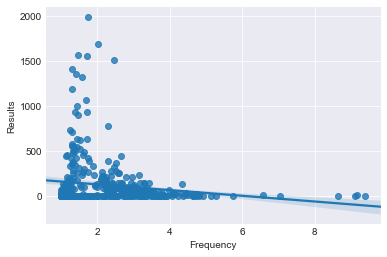

In [31]:
ax = sns.regplot(x="Frequency", y="Results", data=results_out)
ax.figure.savefig('HFNL.png',dpi=800)

In [32]:
A = results_out["Results"]
B = results_out["Frequency"]
#A = sm.add_constant(A)

# Note the difference in argument order
model = sm.OLS(B, A).fit()
predictions = model.predict(A) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Frequency   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     41.64
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           3.02e-10
Time:                        13:57:22   Log-Likelihood:                -975.74
No. Observations:                 423   AIC:                             1953.
Df Residuals:                     422   BIC:                             1958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Results        0.0026      0.000      6.453      0.000       0.002       0.003
==============================================================================
Omnibus:                       97.807   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.039
Skew:                           0.927   Prob(JB):                     2.80e-96
Kurtosis:                       7.640   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>